# Image Basics

Images are stored as `numpy` multidimensional arrays.  This will definitely come in
handy and avoid the need to mess about directly with the images.
Renaming the imports seems to be a thing. 
At least for `numpy` being renamed to `np`.

## Loading Images


`skimage.io.imread()` uses `iio.imread()`

In [24]:
%%time
%matplotlib widget


import imageio.v3 as iio
import numpy as np

eight = iio.imread(uri='../data/raw/training/eight.tif')
assert isinstance(eight, np.ndarray)

print(eight.shape)
print(eight)

(5, 3)
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]
CPU times: user 2.3 ms, sys: 829 μs, total: 3.12 ms
Wall time: 2.53 ms


See that the coordinates are height then width.
left-hand coordinate system.
Also the image is just ones and zeros.

Display the image with `pyplot`.  Why are t

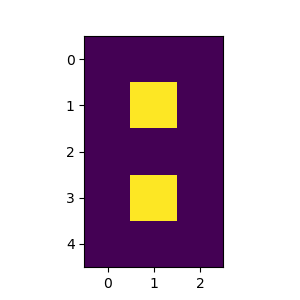

In [25]:
from matplotlib import pyplot

the_figure, the_axes = pyplot.subplots(figsize=(3,3))
the_axes.imshow(eight)

## Working with Pixels

Let's look at the pixels in the image.
Edit the image.
Then show it with the other one.

(-0.5, 2.5, 4.5, -0.5)

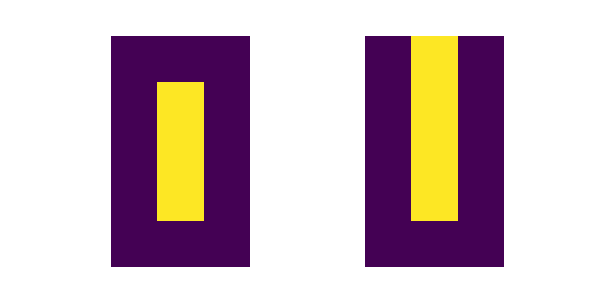

In [26]:
import copy

other_figure, other_axes = pyplot.subplot_mosaic([
    ['left', 'right']
], figsize=(6, 3))

zero = copy.deepcopy(eight)
zero[2,1] = 1.0
other_axes['left'].imshow(zero)
other_axes['left'].axis('off')  # Hide the axes

letter_u = copy.deepcopy(eight)
letter_u[0:4, 1] = 2.0
other_axes['right'].imshow(letter_u)
other_axes['right'].axis('off')  # Hide the axes

## More Colours

256 colours

In [27]:
three_colour_eight = copy.deepcopy(eight)
three_colour_eight = three_colour_eight * 128
three_colour_eight[2, :] = 255
print(three_colour_eight)

[[  0.   0.   0.]
 [  0. 128.   0.]
 [255. 255. 255.]
 [  0. 128.   0.]
 [  0.   0.   0.]]


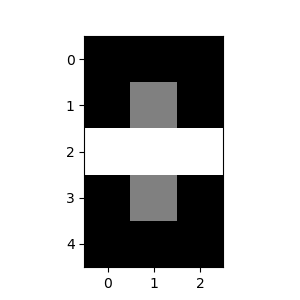

In [28]:
yet_another_figure, yet_another_axes = pyplot.subplots(figsize=(3,3))
yet_another_axes.imshow(three_colour_eight, cmap=pyplot.cm.gray)

## Even More Colours



[[[116  85  57]
  [128 109  94]
  [214  44  62]
  [219 157  21]]

 [[ 93 152 140]
  [246 198 102]
  [ 70  33 101]
  [  7   1 110]]

 [[225 124 229]
  [154 194 176]
  [227  63  49]
  [144 178  54]]

 [[123 180  93]
  [120   5  49]
  [166 234 142]
  [ 71  85  70]]]


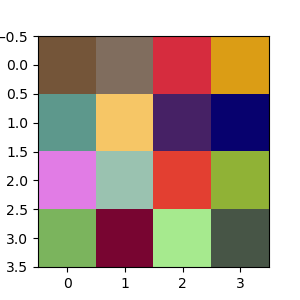

In [29]:
import numpy as np

pseudo_random = np.random.RandomState(seed=2021)
checker_board = pseudo_random.randint(0, 255, size=(4,4,3))
print(checker_board)

the_figure, the_axes = pyplot.subplots(figsize=(3,3))
the_axes.imshow(checker_board)


In [30]:
upper_right_square = checker_board[1,3,:]
red = upper_right_square[0]
green = upper_right_square[1]
blue = upper_right_square[2]

print(f"Red: {red}, Green: {green}, Blue: {blue}")



Red: 7, Green: 1, Blue: 110


Because the three colour channels are held in an array we can do matrix arithmetic on them to extract colours.
This is going to be handy for extracting the colours of leaves etc...
This is 24-bit RGB colour.

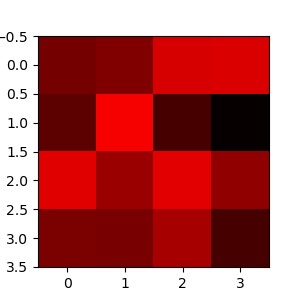

In [31]:
red_filter = np.array([1, 0, 0])  # Red only, RGB
red_channel_only = checker_board * red_filter
the_figure, the_axes = pyplot.subplots(figsize=(3,3))
the_axes.imshow(red_channel_only)